In [55]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2023W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**. 

Imports
------

In [56]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

## Instructions
rubric={points}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/master/docs/homework_instructions.md). 

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows. 

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. Once you are done with the assignment follow the instructions below before the submission. 

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/123439). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

_Points:_ 3

<!-- END QUESTION -->

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

> Make sure you have put the data CSV as `spotify.csv` under the data directory (data/spotify.csv). When you read the data file, use this relative path for the autograder to work properly on Gradescope. 

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [57]:
spotify_df = pd.read_csv('data/spotify.csv', index_col=[0])


In [58]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Number of training and test examples
rubric={autograde}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [59]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [60]:
# Please provide numeric values
n_train_samples = len(train_df)
n_test_samples = len(test_df)
print(n_test_samples)
print(n_train_samples)

404
1613


In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [63]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

#### 1.3 `describe()` method
rubric={autograde}

**Your tasks:**
1. Store the output of describe() on the training split in spotify_summary variable below and display the summary statistics. By default, this function will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? Store the feature name as a string in the `smallest_range_feature` variable below.

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [64]:
spotify_summary = train_df.describe()
spotify_summary



,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [65]:
#featureName = None
#oldDifference = spotify_summary['acousticness'].max() - spotify_summary['acousticness'].min()
#for columnName in spotify_summary.columns.to_list():
#    min = spotify_summary[columnName].min()
#    max = spotify_summary[columnName].max()
#    difference = max-min
#    if difference < oldDifference:
#        oldDifference = difference
#        featureName = columnName
differences = []

for columnName in spotify_summary.columns.to_list():
   min = spotify_summary[columnName].min()
   max = spotify_summary[columnName].max()
   difference = max-min
   differences.append(difference)
print(differences)





[1612.99999716, 1612.852, 1003014.0, 1612.9844, 1613.0, 1613.0, 1612.9812, 1644.082, 1613.0, 1612.9769, 1586.5684258850674, 1612.7521706398354, 1612.9627, 1613.0]


In [66]:

columnList = spotify_summary.columns.tolist()
smallest_range_feature = columnList[9]
print(smallest_range_feature)

...

speechiness


Ellipsis

In [67]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 
rubric={points}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

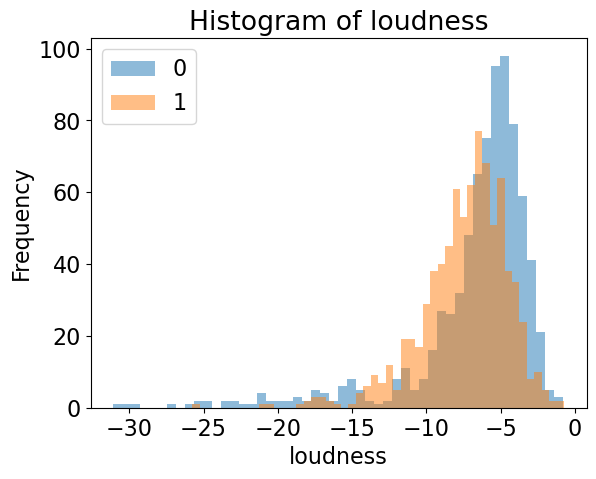

In [68]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 5

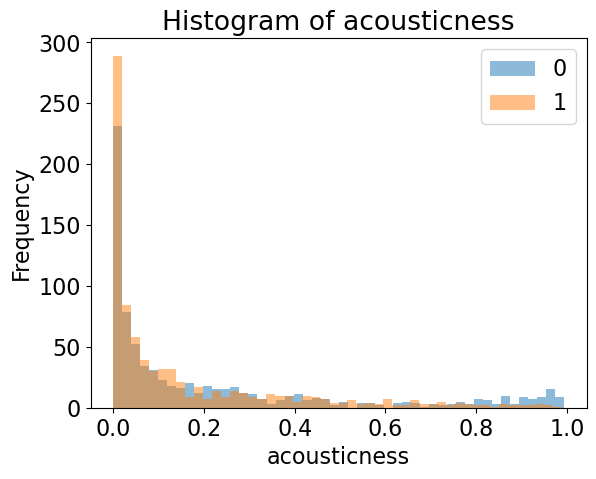

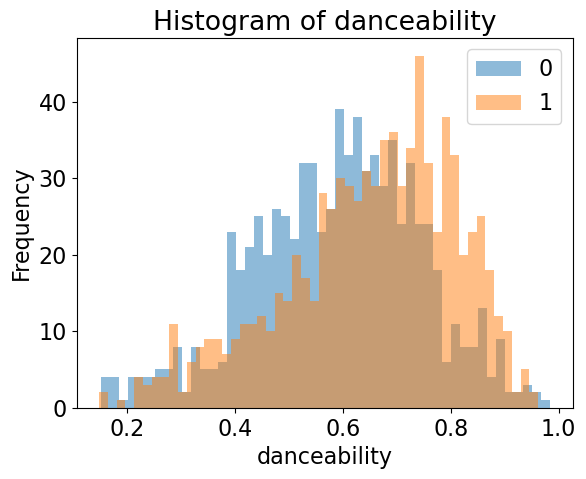

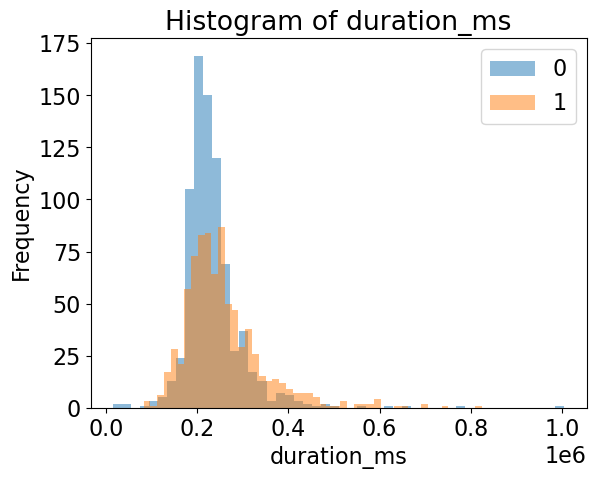

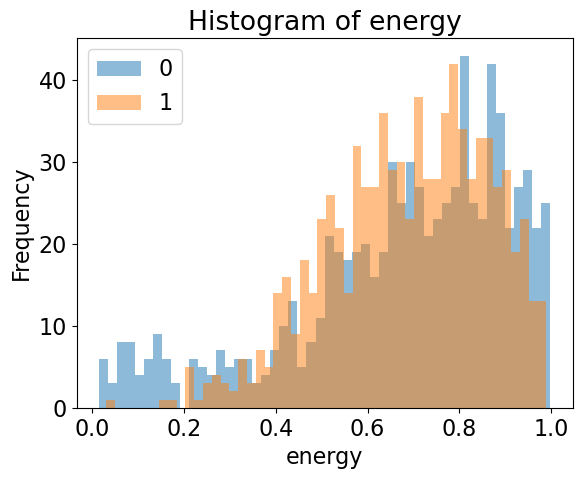

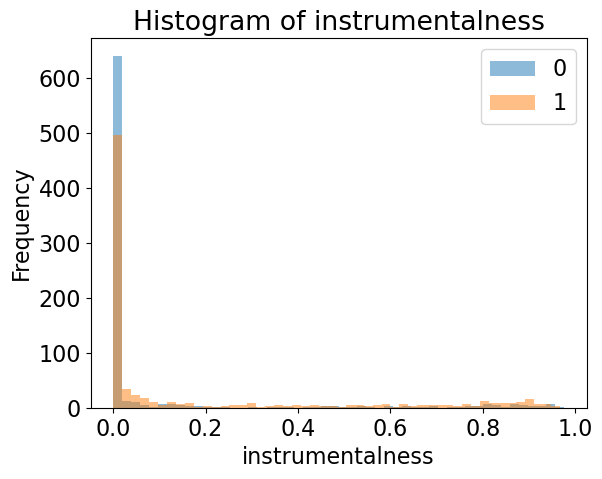

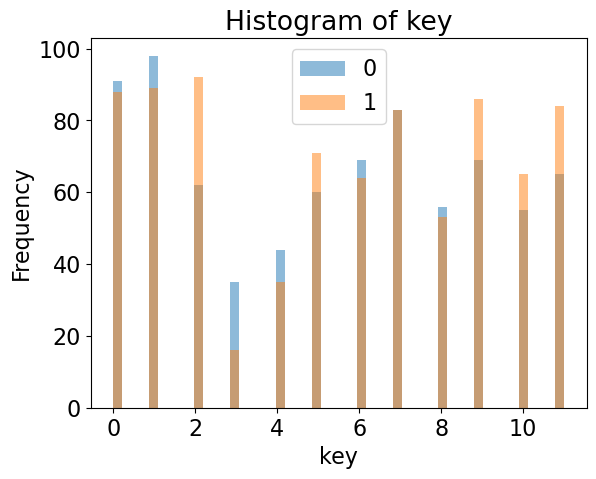

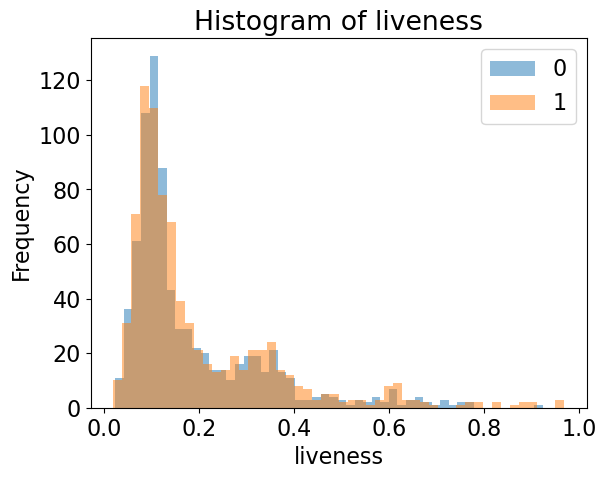

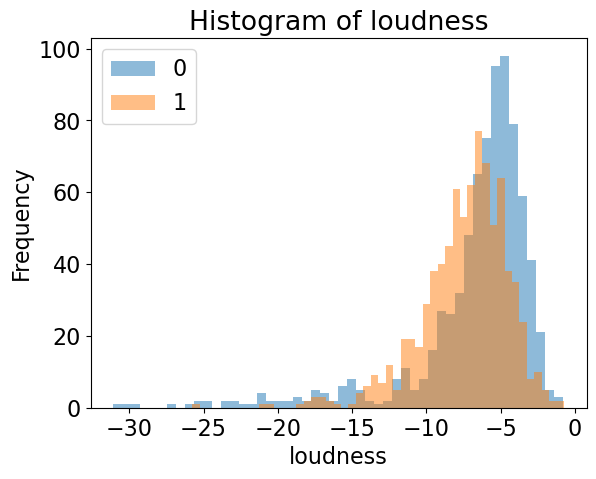

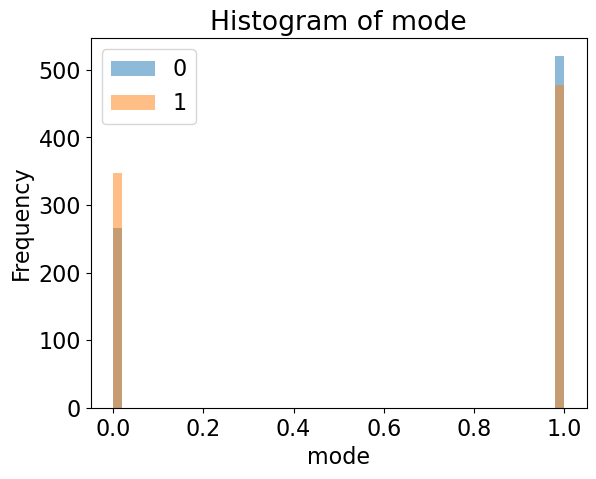

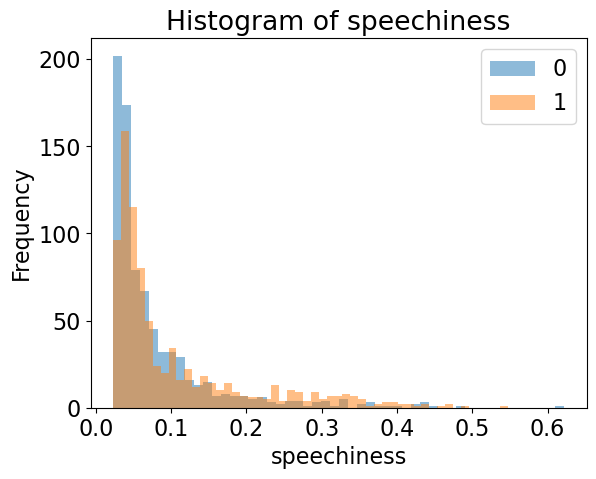

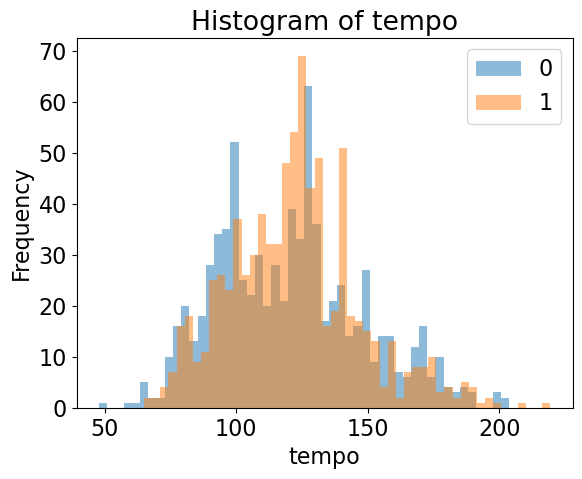

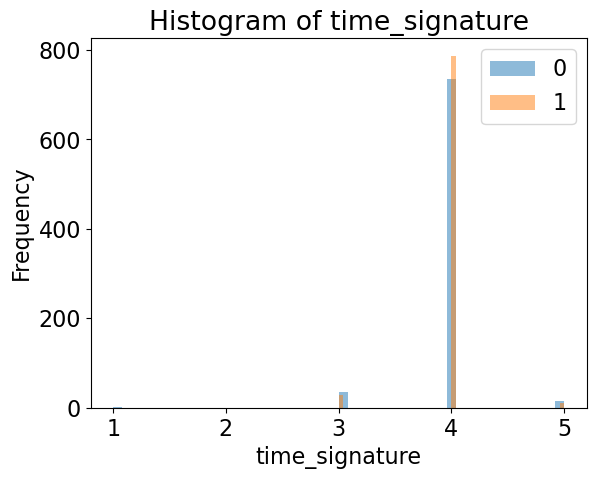

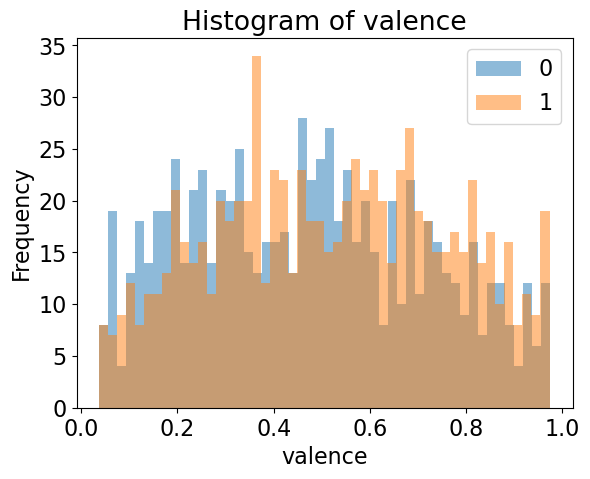

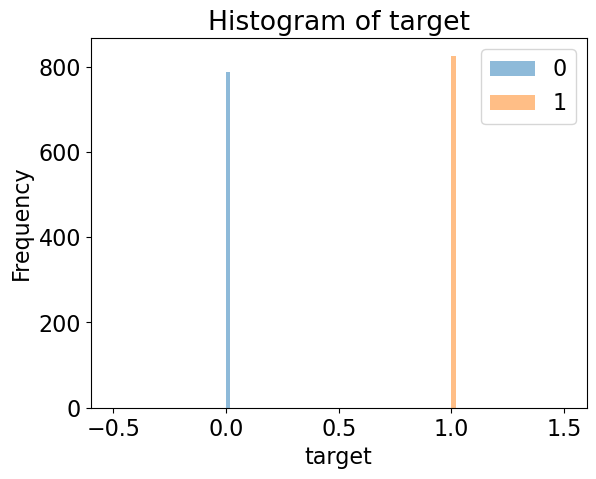

In [69]:
for columnName in spotify_summary.columns.to_list():
    feat = columnName
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
    

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class? Briefly explain your answer. 

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

If the two histograms for a feature are identical, this means that the histogram for target = 0 is the same as the histogram for target = 1. This would indeed mean that this feature would not be useful for predicting the target class because there would be no aspects of the target = 1 histogram that distinguishes itself from the target = 0 histogram as they are identical. For example, the histograms for time signiture are almost identical, and that would mean that time signiture does not particularly influence whether a song is enjoyable or not.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 
rubric={reasoning}

Note that the dataset includes two text features labeled `song_title` and `artist`.

**Your tasks:**

1. Do you think these features could be useful in predicting whether the user liked the song or not? Why or why not? 
2. Would there be any difficulty in using these features, in the form they are, in your model? Briefly explain.    

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

1. These features could be useful, because some people like songs by certain artists more, or song titles could indicate the content of the lyrics of a song, which could influence how much a user likes the song. 

2. It would be difficult to use these features because they are in text form and not numerical. This makes it hard to train a model on the data, plot the features on a graph, and perform computations on the data.


<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1 Separating `X` and `y`
rubric={autograde}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Drop the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [96]:
X_train = train_df.drop(columns=['song_title', 'artist', 'target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['song_title', 'artist', 'target'])
y_test = test_df['target']

...

Ellipsis

In [95]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2.2 Training a baseline model `DummyClassifier`
rubric={autograde}

**Your tasks:**
1. Train a baseline model. In particular, carry out 10-fold cross-validation using `DummyClassifier` with `random_state=123`. Store the mean cross-validation score in the `dummy_score` variable below. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [103]:
from sklearn.dummy import DummyClassifier

dt = DummyClassifier(random_state=123)
dt.fit(X_train, y_train)


dummy_score = dt.score(X_train, y_train)
...

Ellipsis

In [104]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

### 2.3 Training a decision tree mode with default hyperparameters 
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [168]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

...

Ellipsis

In [169]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

### 2.4 Predicting using the trained model
rubric={autograde}

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 2

In [121]:
pred = spotify_tree.predict(X_train.iloc[[0]])
pred = pred[0]
print(pred)

...

1


Ellipsis

In [122]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5 `cross_val_score`
rubric={autograde}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 2

In [178]:
cv_score = cross_val_score(spotify_tree, X_train, y_train, cv = 10)

mean_cv_score = sum(cv_score)/len(cv_score)

print(mean_cv_score)

...

0.6820105820105821


Ellipsis

In [179]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

### 2.6 `cross_validate`
rubric={autograde}

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 3

In [183]:
scores = cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
scores_df = pd.DataFrame.from_dict(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.030120,0.002000,0.685185,0.999311
1,0.030000,0.000999,0.635802,0.998622
2,0.025002,0.001000,0.641975,0.999311
3,0.022943,0.000991,0.708075,0.998623
4,0.022553,0.001000,0.726708,0.998623
5,0.024554,0.001000,0.608696,0.998623
6,0.022065,0.001001,0.714286,0.998623
7,0.023759,0.001251,0.714286,0.999311
8,0.022066,0.000998,0.677019,0.999311
9,0.026000,0.002001,0.708075,0.998623


In [184]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.7 Examining subs-cores
rubric={points}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly explain in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.7
    
</div>

_Points:_ 2

1. The mean cross validation score was 0.68, which seems trustworthy after the 10 fold cross validation because all 10 sub scores from the cross validation are around this value. 
2. There is a significant difference between the training scores and the cross validation scores. The training scores are much higher (basically 100%) because the model was trained on these values, so they would match up perfectly. 

In [83]:
...

Ellipsis

In [84]:
...

Ellipsis

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1 Train and cross-validation accuracies 
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `np.arange(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy. Store your results in the `results_df` dataframe.

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [200]:
from sklearn.tree import DecisionTreeClassifier

depths = np.arange(1, 25, 2)

#adapted from class demo 2

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeClassifier(max_depth = depth, random_state=123)
    
    # Carry out cross-validation
    scores = cross_validate(dt, X_train, y_train, return_train_score=True)
    cv_train_scores.append(scores['train_score'].mean())
    cv_valid_scores.append(scores['test_score'].mean())


<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 5

In [201]:
#adapted from class demo 2

results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                          },
                          index=depths
                           )
results_df


,train_score,valid_score
1,0.645538,0.642924
3,0.731867,0.709869
5,0.800683,0.716676
7,0.865003,0.716061
9,0.915064,0.699948
11,0.958615,0.689404
13,0.982484,0.697466
15,0.992869,0.678855
17,0.998140,0.685074
19,0.998605,0.685074


In [202]:
results_df.shape

(12, 2)

In [203]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Visualization 
rubric={points}

1. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Save the plot to `max_depth_plot`.

**Ensure your plot `max_depth_plot` includes the following:**

1. Both the train accuracy and the cross-validation accuracy are included in the plot.
2. Include a legend to specify which is which. 
3. The provided `max_depth` values are used.
4. The x-axis and y-axis have reasonable names.
5. The data points are correct.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 5

<Axes: title={'center': 'song enjoyability depth vs r2 score'}, ylabel='r2 score'>

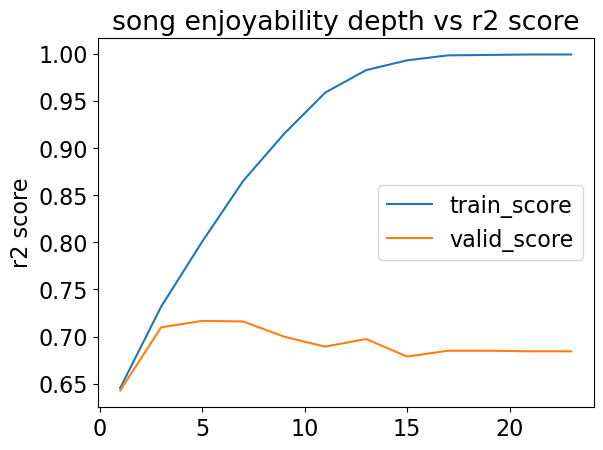

In [204]:
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = results_df[['train_score', 'valid_score']].plot(ylabel='r2 score', title='song enjoyability depth vs r2 score')
max_depth_plot

In [191]:
assert not max_depth_plot is None, "Are you storing the plot in a variable?"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 `max_depth` and the fundamental tradeoff
rubric={points}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 2

As max_depth increases, the training accuracy continues to rise until it plateaus, while the cross-validation accuracy increases for a little bit, then quickly decreases. This is because adding depth makes the model more accurately fit the training data. However, if the depth is too high, the model is overfitted for the training data and start to perform worse and worse on the test data the more it's fitted to the training data. There is an optimal amount of fitting/depth where the cross validation accuracy is the highest. 

<!-- END QUESTION -->

<br><br>

### 3.4 Picking a reasonable value for `max_depth`
rubric={autograde}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 2

In [205]:
best_max_depth = 7

...

Ellipsis

In [206]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<br><br>

### 3.5 Final assessment on the test set
rubric={autograde}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below.

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 3

In [212]:
best_model = DecisionTreeClassifier(max_depth=7, random_state=123)
best_model.fit(X_train, y_train)
best_model.score(X_train, y_train)

test_score = best_model.score(X_test, y_test)

In [213]:
grader.check("q3.5")

q3.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.6 Analysis
rubric={points}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.6
    
</div>

_Points:_ 5

1. The test scores are similar to the cross validation scores. This indicates that cross validation is an effective way to train the model.
2. If you pick the value of max_depth that give best accuracy on training data, the model will be overfitted to the training data and will generalize poorly when given data that does not match exactly with the training data.
3. Yes, because the max depth chosen was the one that generalized the best when given data different from its training data. 

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 3

1. True: -1, False: +1
2. 5/6 (the 2 2 would be classified incorrectly)
3. No

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Congratulations on working with your first machine learning model! Well done 👏👏!

![](img/eva-well-done.png)